In [3]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -------------------------------------- 165.5/165.5 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.4/7.9 MB 12.2 MB/s eta 0:00:01
   -- ------------------------------------- 0.6/7.9 MB 9.1 MB/s eta 0:00:01
   ------ --------------------------------- 1.2/7.9 MB 9.8 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/7.9 MB 9.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/7.9 MB 9.5 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/7.9 MB 9.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/7.9 MB 9.4 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/7.9 MB 9.4 MB/s eta 0:00:01
   ------------------- -------------------- 3.8/7.9 MB 9.3 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.9 MB 9.3 MB/s eta 0:00:01
   --------------


[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Imports

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import datasets

## Linear Regression algorithm

1. Initialise the class with a set learning rate, and number of iterations. Set weight and bias to None.
2. Inside the fit function: unpack sample number and features from shape of X, create random weights for size of samples and bias to 0.
3. Loop over the set number of iterations and inside the loop do a dot product of the weights and X Values, create differentials for the weights and bias and update the weights and bias using respective differentials, return self
4. Inside predict function, dot product the weights with X and add the bias

In [51]:
class LinearRegression:
    def __init__(self, lr: int = 0.01, n_iters: int=1000) -> None:
        # initialise class parameters
        self.lr = lr # parameterised learning rate
        self.n_iters = n_iters # parameterised number of iterations
        self.weights = None # set weights to None as they will be found during fitting
        self.bias = None  # set bias to None as it will be found during fitting

    def fit(self, X, y):
        sample_number, sample_features = X.shape # unpack sample number and sample features from shape of X
        self.weights = np.random.rand(sample_features) # create random weights for start of fitting
        self.bias = 0 # set initial bias to 0

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias # y = WnXn + b so do dot product

            # differentials
            dw = (1/sample_number) * np.dot(X.T, y_pred - y) #dw = dyX^T / num_samples
            db = (1/sample_number) * np.sum(y_pred-y) # db = sum(dy) / num_samples

            self.weights = self.weights - (self.lr * dw) # update weights after fitting iteration
            self.bias = self.bias - (self.lr * db)  # update bias after fitting iteration

        return self # return the model itself

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias # recreate line of best fit with newfound weights and bias

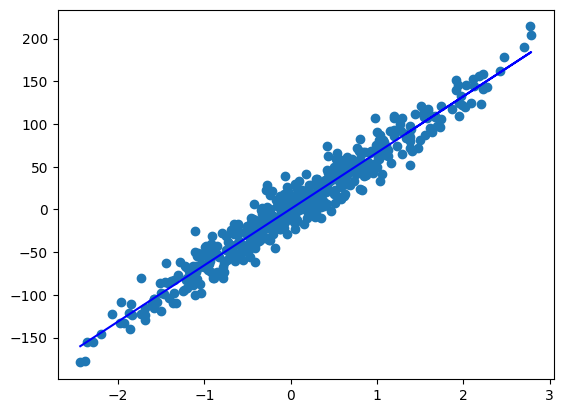

In [52]:
regressor = LinearRegression()

reg = regressor.fit(X, y)

y_pred = reg.predict(X)

plt.figure()
plt.scatter(X, y)
plt.plot(X, y_pred, 'b')
plt.show()